<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task" data-toc-modified-id="Task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Approach" data-toc-modified-id="Approach-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Approach</a></span></li><li><span><a href="#Research" data-toc-modified-id="Research-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Research</a></span><ul class="toc-item"><li><span><a href="#Definitions" data-toc-modified-id="Definitions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Definitions</a></span><ul class="toc-item"><li><span><a href="#Learning-to-Rank-methods-overview" data-toc-modified-id="Learning-to-Rank-methods-overview-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Learning-to-Rank methods overview</a></span></li><li><span><a href="#NDCG-measure" data-toc-modified-id="NDCG-measure-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>NDCG measure</a></span></li></ul></li><li><span><a href="#Initial-findings" data-toc-modified-id="Initial-findings-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Initial findings</a></span><ul class="toc-item"><li><span><a href="#Overall-Research-Papers-and-other-Sources" data-toc-modified-id="Overall-Research-Papers-and-other-Sources-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Overall Research Papers and other Sources</a></span></li><li><span><a href="#Ranking-Metric-Optimization" data-toc-modified-id="Ranking-Metric-Optimization-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Ranking Metric Optimization</a></span></li><li><span><a href="#Unbiased-Learning-to-Rank" data-toc-modified-id="Unbiased-Learning-to-Rank-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Unbiased Learning-to-Rank</a></span></li><li><span><a href="#Experiments-that-could-follow-after-initial-POC" data-toc-modified-id="Experiments-that-could-follow-after-initial-POC-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Experiments that could follow after initial POC</a></span></li></ul></li></ul></li><li><span><a href="#Model-implementation" data-toc-modified-id="Model-implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model implementation</a></span><ul class="toc-item"><li><span><a href="#Library-imports" data-toc-modified-id="Library-imports-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Library imports</a></span></li><li><span><a href="#Preparing-and-looking-at-dataset" data-toc-modified-id="Preparing-and-looking-at-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Preparing and looking at dataset</a></span></li><li><span><a href="#Data-modeling" data-toc-modified-id="Data-modeling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data modeling</a></span><ul class="toc-item"><li><span><a href="#Defining-train/test-subsets" data-toc-modified-id="Defining-train/test-subsets-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Defining train/test subsets</a></span></li><li><span><a href="#Defining-'y'-label" data-toc-modified-id="Defining-'y'-label-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Defining 'y' label</a></span></li><li><span><a href="#Scaling-data-numerics" data-toc-modified-id="Scaling-data-numerics-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Scaling data numerics</a></span></li><li><span><a href="#Defining-final-train/test-sets" data-toc-modified-id="Defining-final-train/test-sets-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Defining final train/test sets</a></span></li><li><span><a href="#Building-ranker" data-toc-modified-id="Building-ranker-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Building ranker</a></span></li><li><span><a href="#Predicting-and-re-ranking" data-toc-modified-id="Predicting-and-re-ranking-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Predicting and re-ranking</a></span></li></ul></li></ul></li></ul></div>

<br><br><br><br>
# Task

Using provided Learning to Rank dataset, the **task is to engineer a machine learning model
that re-ranks documents optimising NDCG measure** (relevancy being approximated by ``clicked`` column).

The dataset is provided in the form of a CSV file, which consists of the following columns:
* listing identifier – ``listing_id``
* rank of a document in the listing – ``doc_rank``
* whether a document was relevant – ``clicked``
* numerical features – ``n0`` through ``n44``
* categorical features – ``c0`` through ``c4``

<br><br><br><br>
# Approach

As a Proof-of-Concept model a **XGBRanker** from XGBoost library v.0.81 was used. With objective defined as ``rank:ndcg`` parameter it uses *LambdaMART* algorithm to perform list-wise ranking where NDCG is maximized.<br>

It is an implementation of the Scikit-Learn API for XGBoost Ranking and is based on XGBModel.

**Note**: Confined to smaller scales, models like GBDT are arguably at par in performance and easier to handle than Deep NN aproach, and it is relevant to use them for focused medium sized problems.

<br><br><br><br><br><br><br>
# Research
/ method, definitions, research papers, initial thoughts, concepts /

## Definitions

### Learning-to-Rank methods overview

**Methods**

* **Pointwise**<br>
Pointwise approaches look at a <u>single document</u> at a time in the loss function. They essentially take a single document and train a classifier / regressor on it to predict how relevant it is for the current query. The final ranking is achieved by simply sorting the result list by these document scores. For pointwise approaches, the score for each document is independent of the other documents that are in the result list for the query.
*All the standard regression and classification algorithms can be directly used for pointwise learning to rank.*<br><br>
* **Pairwise**<br>
Pairwise approaches look at a <u>pair of documents</u> at a time in the loss function. Given a pair of documents, they try and come up with the optimal ordering for that pair and compare it to the ground truth. The goal for the ranker is to minimize the number of inversions in ranking i.e. cases where the pair of results are in the wrong order relative to the ground truth.<br>
Pairwise approaches work better in practice than pointwise approaches because predicting relative order is closer to the nature of ranking than predicting class label or relevance score. *Some of the most popular Learning to Rank algorithms like RankNet, LambdaRank and LambdaMART are pairwise approaches.*
<br><br>
* **Listwise**<br>
Listwise approaches directly look at the <u>entire list of documents</u> and try to come up with the optimal ordering for it. There are 2 main sub-techniques for doing listwise Learning to Rank:
    - Direct optimization of Information Retrieval measures such as NDCG. E.g. *SoftRank, AdaRank*
    - Minimize a loss function that is defined based on understanding the unique properties of the kind of ranking you are trying to achieve. E.g. *ListNet, ListMLE*
<br>

source: https://medium.com/@nikhilbd/pointwise-vs-pairwise-vs-listwise-learning-to-rank-80a8fe8fadfd

**Sample algorithms**

* **RankNet**<br>
RankNet was originally developed using neural nets, but the underlying model can be different and is not constrained to just neural nets. The cost function for RankNet aims to minimize the number of inversions in ranking. Here an inversion means an incorrect order among a pair of results, i.e. when we rank a lower rated result above a higher rated result in a ranked list. RankNet optimizes the cost function using Stochastic Gradient Descent.<br><br>

* **LambdaRank**<br>
It was found that during RankNet training procedure, you don't need the costs, only need the gradients (λ) of the cost with respect to the model score. One can think of these gradients as little arrows attached to each document in the ranked list, indicating the direction we’d like those documents to move.<br>
Further it was found that scaling the gradients by the change in NDCG found by swapping each pair of documents gave good results. The core idea of LambdaRank is to use this new cost function for training a RankNet. On experimental datasets, this shows both speed and accuracy improvements over the original RankNet.<br><br>

* **LambdaMART**<br>
LambdaMART combines LambdaRank and MART (Multiple Additive Regression Trees). While MART uses gradient boosted decision trees for prediction tasks, LambdaMART uses gradient boosted decision trees using a cost function derived from LambdaRank for solving a ranking task. On experimental datasets, LambdaMART has shown better results than LambdaRank and the original RankNet.

source: https://www.quora.com/What-is-the-intuitive-explanation-of-Learning-to-Rank-and-algorithms-like-RankNet-LambdaRank-and-LambdaMART-In-what-types-of-data-variables-can-these-techniques-be-used-What-are-their-strengths-and-limitations/answer/Nikhil-Dandekar

**Papers**

* **From RankNet to LambdaRank to LambdaMART: An Overview** (Microsoft Research Technical Report MSR-TR-2010-82) -https://www.microsoft.com/en-us/research/publication/from-ranknet-to-lambdarank-to-lambdamart-an-overview/ / https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf

### NDCG measure
(definition: https://en.wikipedia.org/wiki/Discounted_cumulative_gain)<br><br>
NDCG (normalised discounted cumulative gain) is a single-number measure of effectiveness of a ranking algorithm that allows non-binary relevance judgments. It has a strong relationship to the average precision (AP), but has a discounting function with a very heavy tail that must be truncated.<br>

NDCG has two advantages compared to many other measures: 
- allows each retrieved document has graded relevance while most traditional ranking measures only allow binary relevance. That is, each document is viewed as either relevant or not relevant by previous ranking measures, while there can be degrees of relevancy for documents in NDCG.
- involves a discount function over the rank while many other measures uniformly weight all positions. This feature is particularly important for search engines as users care top ranked documents much more than others.

NDCG is a normalization of the Discounted Cumulative Gain (DCG) measure. (For formal definition of both DCG and NDCG, please see Section 2.) DCG is a weighted sum of the degree of relevancy of the ranked items. The weight is a decreasing function of the rank (position) of the object, and therefore called discount.
<br>(...)<br>
<u>Search engine systems also use a cut-off top-k version of NDCG</u>. That is, the discount is set to be zero for ranks larger than k. Such NDCG measure is usually referred to as NDCG@k.
<br><br>
source: *A Theoretical Analysis of NDCG Ranking Measures* (in papers section below)

<br><br>
**Other measures**: MAP (Mean Average Precision), MRR (Mean Reciprocal Rank), AUC (Area Under the ROC Curve), ERR (Expected reciprocal rank), Yandex's pfound

**Papers**

* **A Theoretical Analysis of NDCG Ranking Measures** (PMLR Volume 30: Conference on Learning Theory, 12-14 June 2013) - http://proceedings.mlr.press/v30/Wang13.pdf
* **Metric Learning to Rank** (The 27th International Conference on Machine Learning (ICML 2010)) - https://icml.cc/Conferences/2010/papers/504.pdf / https://bmcfee.github.io/papers/mlr.pdf
* **Learning to Rank by Optimizing NDCG Measure** (NIPS 2009) - https://papers.nips.cc/paper/3758-learning-to-rank-by-optimizing-ndcg-measure / https://papers.nips.cc/paper/3758-learning-to-rank-by-optimizing-ndcg-measure.pdf

<br><br>
## Initial findings

### Overall Research Papers and other Sources

* **Hashing as Tie-Aware Learning to Rank** (Optimizing NDCG and AP; 2018)  - https://arxiv.org/abs/1705.08562v4

* **TF-Ranking: A Scalable TensorFlow Library for Learning-to-Rank** (2018) - https://ai.googleblog.com/2018/12/tf-ranking-scalable-tensorflow-library.html / https://arxiv.org/abs/1812.00073

* **Learning Groupwise Scoring Functions Using Deep Neural Networks** - https://arxiv.org/abs/1811.04415

* **Direct Learning to Rank and Rerank** (Proceedings of Machine Learning Research, Volume 84: International Conference on Artificial Intelligence and Statistics, 9-11 April 2018) http://proceedings.mlr.press/v84/rudin18a.html / http://proceedings.mlr.press/v84/rudin18a/rudin18a.pdf

* **Learning to rank @ allegro.pl** - https://www.youtube.com/watch?v=O7v9u_gSy7Y

### Ranking Metric Optimization

An important research challenge in learning-to-rank is direct optimization of ranking metrics (such as the previously mentioned NDCG and MRR). These metrics, while being able to measure the performance of ranking systems better than the standard classification metrics like Area Under the Curve (AUC), have the unfortunate property of being either discontinuous or flat. Therefore standard stochastic gradient descent optimization of these metrics is problematic.
<br><br>
In recent work, Google proposed a novel method, *LambdaLoss*, which provides a principled probabilistic framework for ranking metric optimization. In this framework, metric-driven loss functions can be designed and optimized by an expectation-maximization procedure. The TF-Ranking library integrates the recent advances in direct metric optimization and provides an implementation of LambdaLoss.

source: https://ai.googleblog.com/2018/12/tf-ranking-scalable-tensorflow-library.html

**Paper**
* The LambdaLoss Framework for Ranking Metric Optimization - https://ai.google/research/pubs/pub47258 / https://ai.google/research/pubs/pub47258.pdf

### Unbiased Learning-to-Rank

Prior research has shown that given a ranked list of items, users are much more likely to interact with the first few results, regardless of their relevance. This observation has inspired research interest in unbiased learning-to-rank, and led to the development of unbiased evaluation and several unbiased learning algorithms, based on training instances re-weighting. In the Google's TF-Ranking library, metrics are implemented to support unbiased evaluation and losses are implemented for unbiased learning by natively supporting re-weighting to overcome the inherent biases in user interactions datasets. 

source: https://ai.googleblog.com/2018/12/tf-ranking-scalable-tensorflow-library.html

**Paper**
* Addressing Trust Bias for Unbiased Learning-to-Rank (2019) - https://ai.google/research/pubs/pub47859.pdf
* Position Bias Estimation for Unbiased Learning to Rank in Personal Search (2018) - https://ai.google/research/pubs/pub46485.pdf
* Counterfactual Learning-to-Rank for Additive Metrics and Deep (2018) - http://www.cs.cornell.edu/people/tj/publications/agarwal_etal_18b.pdf
* Unbiased Learning-to-Rank with Biased Feedback (2017) - http://www.cs.cornell.edu/people/tj/publications/joachims_etal_17a.pdf

### Experiments that could follow after initial POC

* Further hyperparameters tuning with XGBRanker
<br><br>
* Checking for position/presentation bias
    - **Paper:** Unbiased Learning-to-Rank with Biased Feedback (2017) - http://www.cs.cornell.edu/people/tj/publications/joachims_etal_17a.pdf
<br><br>

* Combine search phrases with image (transfer learning with CNNs trained on ImageNet) and text (Word2vec/GloVe embeddings)
* Combine NN with LambdaMART algorithm
* Using listing ids as features as index into an embedding, which allowes to learn a vector representation per listing, encoding their unique properties.
    - **Paper:** Applying Deep Learning To Airbnb Search (2018) - https://arxiv.org/pdf/1810.09591.pdf
<br><br>

* Trying out the recent Google's TF-Ranking library
    - **GitHub:** https://github.com/tensorflow/ranking
<br><br>

* Working on Counterfactual Learning-to-Rank framework
    - **Paper:** http://www.cs.cornell.edu/people/tj/publications/agarwal_etal_18b.pdf <br>
    Focusing on DCG, this conceptual generalization gives rise to two new learning methods that both directly optimize an unbiased estimate of DCG despite the bias in the implicit feedback data. The first, SVM PropDCG, generalizes the Propensity Ranking SVM (SVM PropRank), and we show how the resulting optimization problem can be addressed via the Convex Concave Procedure (CCP). The second, Deep PropDCG, further generalizes the counterfactual learning-to-rank approach to deep networks as non-linear ranking functions. In addition to the theoretical support, we empirically find that SVM PropDCG significantly outperforms SVM PropRank in terms of DCG, and that it is robust to varying severity of presentation bias, noise, and propensity-model misspecification. Moreover, the ability to train non-linear ranking functions via Deep PropDCG further improves DCG.
<br><br>

* Using Learning-to-Rank with Elasticsearch
    - **Source:** https://opensourceconnections.com/blog/2017/02/14/elasticsearch-learning-to-rank/
    - **GitHub:** https://github.com/o19s/elasticsearch-learning-to-rank

<br><br><br><br><br><br><br>
# Model implementation 

## Library imports

In [1]:
# Standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Model libs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.model_selection import cross_val_score, GroupKFold
# from sklearn.metrics import accuracy_score, make_scorer

from xgboost import XGBRanker
from xgboost.callback import early_stop, print_evaluation
from xgboost import plot_importance

In [3]:
# XGBRanker is implemented in XGBoost version >= 0.81
import xgboost as xgb
print('XGBRanker v.' + xgb.__version__)

XGBRanker v.0.81


<br><br>
## Preparing and looking at dataset

Loading dataset

In [4]:
data = pd.read_csv('data/dataset_v2.csv')

Shape of dataset. There are 100k listings with overall ~4.9m presented documents.

In [5]:
print('Data shape:', data.shape)
print('Number of listings:', data['listing_id'].nunique())

Data shape: (4885214, 53)
Number of listings: 100000


Simple statistics for listing_id. The listings range from 2 to 60 presented documents in each with mean of ~49 per listing.

In [6]:
data['listing_id'].value_counts().describe()

count    100000.000000
mean         48.852140
std          19.479057
min           2.000000
25%          43.000000
50%          60.000000
75%          60.000000
max          60.000000
Name: listing_id, dtype: float64

Listings differ in presentation volume and a 2/3 of them contain 60 documents.

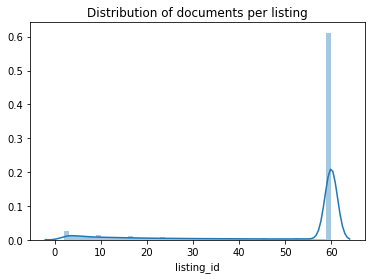

In [7]:
plt.title('Distribution of documents per listing')
sns.distplot(data['listing_id'].value_counts());

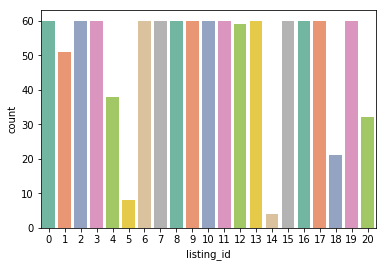

In [8]:
sns.countplot(data[data['listing_id'] <= 20]['listing_id'], palette='Set2');

Sample observations

In [9]:
data.head()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
0,0,0,0,87.0,86.0,87.0,0.000000,0.142328,0.007693,0.0,...,99999.0,0.048142,-0.131414,-0.125540,19.99,0,0,4,0,0
1,0,1,0,87.0,86.0,87.0,0.023810,0.758929,0.091036,0.0,...,1000.0,0.060197,-0.131414,-0.125540,17.90,0,0,4,0,0
2,0,2,0,87.0,86.0,87.0,0.000000,0.133929,0.001270,0.0,...,5.0,-0.119726,-0.276582,-0.213422,9.75,0,0,3,0,0
3,0,3,0,87.0,86.0,87.0,0.062500,2.175595,0.276685,0.0,...,600.0,0.191341,-0.131414,-0.125540,19.99,0,0,4,0,0
4,0,4,0,87.0,86.0,87.0,0.026786,1.547619,0.044791,0.0,...,99999.0,-0.137913,-0.131414,-0.125540,7.99,0,0,4,0,0


In [10]:
data.tail()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
4885209,99999,55,0,0.0,0.0,0.0,0.0,0.002976,0.000000,0.0,...,50.0,0.520656,0.143999,0.323712,25.90,0,0,4,1,3
4885210,99999,56,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,6.0,0.716215,0.143999,0.323712,109.99,0,0,4,1,3
4885211,99999,57,0,0.0,0.0,0.0,0.0,0.000000,0.000148,0.0,...,10.0,0.420662,0.143999,0.323712,39.00,0,0,4,1,3
4885212,99999,58,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,7.0,0.772205,0.143999,0.323712,124.49,0,0,4,1,3
4885213,99999,59,0,0.0,0.0,0.0,0.0,0.000000,0.000179,0.0,...,3.0,0.896056,0.143999,0.323712,109.99,0,0,4,1,3


There are slightly more documents clicked (~108k) than listings (100k).

In [11]:
data['clicked'].value_counts()

0    4776361
1     108853
Name: clicked, dtype: int64

<br><br><br><br><br><br><br>
## Data modeling

### Defining train/test subsets

In [34]:
# Splitting original dataset for train/test subsets 

threshold = 10000
threshold_upper = 12000

data_train = data[data['listing_id'] <= threshold]
data_test = data[(data['listing_id'] > threshold) & (data['listing_id'] <= threshold_upper)]

<br><br>
### Defining 'y' label

In [35]:
# Defining relevance label
y_train = data_train.pop('clicked')
y_test = data_test.pop('clicked')

In [36]:
data_train.shape, data_test.shape, y_train.shape, y_test.shape

((494834, 52), (97408, 52), (494834,), (97408,))


<br><br>
### Scaling data numerics

In [37]:
data_train_numerics = data_train.loc[:,'n0':]
data_test_numerics = data_test.loc[:,'n0':]

In [38]:
data_train_numerics.head(2)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
0,87.0,86.0,87.0,0.00000,0.142328,0.007693,0.0,0.0,0.0,0.01,...,99999.0,0.048142,-0.131414,-0.12554,19.99,0,0,4,0,0
1,87.0,86.0,87.0,0.02381,0.758929,0.091036,0.0,0.0,0.0,0.01,...,1000.0,0.060197,-0.131414,-0.12554,17.90,0,0,4,0,0


In [39]:
data_test_numerics.head(2)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
494834,80.0,98.0,86.0,0.032738,0.791667,0.136692,0.0,0.01,0.0,0.03,...,1200.0,0.867136,0.426012,0.198007,19.99,0,0,4,1,1
494835,80.0,98.0,86.0,0.023810,0.684524,0.113259,0.0,0.00,0.0,0.01,...,10000.0,0.856878,0.426012,0.198007,29.50,0,0,4,1,1


In [ ]:
# Defining scaler
numeric_scaler = StandardScaler()

# Fit & transform train set
train_numerics_scaled = numeric_scaler.fit_transform(data_train_numerics)
train_numerics_scaled = pd.DataFrame(train_numerics_scaled, columns=data_train_numerics.columns, index=data_train_numerics.index)

# Transform test set
test_numerics_scaled = numeric_scaler.transform(data_test_numerics)
test_numerics_scaled = pd.DataFrame(test_numerics_scaled, columns=data_test_numerics.columns, index=data_test_numerics.index)

In [41]:
train_numerics_scaled.head(2)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
0,1.211761,1.108089,1.1926,-0.343223,-0.184692,-0.229624,-0.276655,-0.322053,-0.346921,-0.514283,...,5.007544,-3.156401,-2.511417,-1.626134,-0.043119,-0.336061,-0.295113,-0.029593,-1.137446,-0.957742
1,1.211761,1.108089,1.1926,1.494542,0.995122,1.524552,-0.276655,-0.322053,-0.346921,-0.514283,...,-0.181954,-3.100811,-2.511417,-1.626134,-0.043738,-0.336061,-0.295113,-0.029593,-1.137446,-0.957742


In [42]:
test_numerics_scaled.head(2)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
494834,1.034377,1.401779,1.167539,2.183704,1.057764,2.485525,-0.276655,-0.178179,-0.346921,-0.414861,...,-0.171471,0.620480,-0.457059,-0.712891,-0.043119,-0.336061,-0.295113,-0.029593,0.566174,0.294427
494835,1.034377,1.401779,1.167539,1.494542,0.852755,1.992307,-0.276655,-0.322053,-0.346921,-0.514283,...,0.289823,0.573175,-0.457059,-0.712891,-0.040301,-0.336061,-0.295113,-0.029593,0.566174,0.294427


<br><br>
### Defining final train/test sets

In [43]:
# Merging listing and docs columns with numerics dataframes
train_adult = pd.concat([data_train.loc[:,:'doc_rank'], train_numerics_scaled], axis=1)
test_adult = pd.concat([data_test.loc[:,:'doc_rank'], test_numerics_scaled], axis=1)

In [44]:
# Shape of final dataframes
train_adult.shape, test_adult.shape

((494834, 52), (97408, 52))

In [45]:
train_adult.head(2)

,listing_id,doc_rank,n0,n1,n2,n3,n4,n5,n6,n7,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
0,0,0,1.211761,1.108089,1.1926,-0.343223,-0.184692,-0.229624,-0.276655,-0.322053,...,5.007544,-3.156401,-2.511417,-1.626134,-0.043119,-0.336061,-0.295113,-0.029593,-1.137446,-0.957742
1,0,1,1.211761,1.108089,1.1926,1.494542,0.995122,1.524552,-0.276655,-0.322053,...,-0.181954,-3.100811,-2.511417,-1.626134,-0.043738,-0.336061,-0.295113,-0.029593,-1.137446,-0.957742


In [46]:
test_adult.head(2)

,listing_id,doc_rank,n0,n1,n2,n3,n4,n5,n6,n7,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
494834,10001,0,1.034377,1.401779,1.167539,2.183704,1.057764,2.485525,-0.276655,-0.178179,...,-0.171471,0.620480,-0.457059,-0.712891,-0.043119,-0.336061,-0.295113,-0.029593,0.566174,0.294427
494835,10001,1,1.034377,1.401779,1.167539,1.494542,0.852755,1.992307,-0.276655,-0.322053,...,0.289823,0.573175,-0.457059,-0.712891,-0.040301,-0.336061,-0.295113,-0.029593,0.566174,0.294427


<br><br>

### Building ranker

**XGBRanker** model is build as a PoC. With ``rank:ndcg`` as objective it uses *LambdaMART* to perform list-wise ranking where **NDCG is maximized**.<br>

<u>Group information is required for ranking tasks.</u><br>
Before fitting the model, the data need to be sorted by group. When fitting the model, you need to provide an additional array that contains the size of each group.

In [47]:
# Defining grouping array
groups = train_adult['listing_id'].value_counts().sort_index()

# Defining evaluation sets and groups
eval_set = [(train_adult.drop('doc_rank', axis=1), y_train),
            (test_adult.drop('doc_rank', axis=1), y_test)]
eval_group = [train_adult['listing_id'].value_counts().sort_index(),
              test_adult['listing_id'].value_counts().sort_index()]

In [48]:
# Building ranker. Using LambdaMART with NDCG as objective
param_dist = {'objective':'rank:ndcg', 
              'n_estimators':150,
              'random_state':42,
              'n_jobs':-1
             }

ranker = XGBRanker(**param_dist)

ranker.fit(X=train_adult.drop('doc_rank', axis=1), 
           y=y_train,
           group=groups,
           eval_set=eval_set,
           eval_group=eval_group,
           eval_metric='ndcg',
           verbose=False)

evals_result = ranker.evals_result

In [49]:
print(' Train NDCG score: {} \n Test NDCG score:  {}'.format(np.mean(evals_result['eval_0']['ndcg']),
                np.mean(evals_result['eval_1']['ndcg'])))

 Train NDCG score: 0.41954768000000003 
 Test NDCG score:  0.41412291333333334


<br><br>
### Predicting and re-ranking

In [50]:
preds = ranker.predict(test_adult.drop('doc_rank', axis=1))

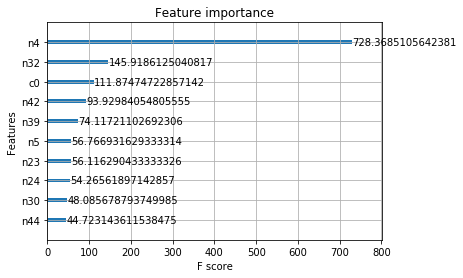

In [51]:
plot_importance(ranker, max_num_features=10, importance_type='gain');

In [52]:
listing_df = test_adult.loc[:,:'doc_rank']
preds_df = pd.DataFrame(preds, index=test_adult.index, columns=['predictions'])
clicked_df = pd.DataFrame(y_test, index=test_adult.index, columns=['clicked'])

results = pd.concat([
                        listing_df, 
                        preds_df,
                        clicked_df
                    ],
                        axis=1).sort_values(by=['listing_id','predictions'], ascending=(True,False))

# Sample re-ranked listing
results[results['listing_id'] == 10005].head()

,listing_id,doc_rank,predictions,clicked
495079,10005,5,1.762337,0
495088,10005,14,1.127221,1
495090,10005,16,1.090742,0
495082,10005,8,0.937371,0
495083,10005,9,0.904550,0


In [54]:
# Original ranking - clicked on 14th place
data[data['listing_id'] == 10005].loc[:,:'clicked'].head(15)

,listing_id,doc_rank,clicked
495074,10005,0,0
495075,10005,1,0
495076,10005,2,0
495077,10005,3,0
495078,10005,4,0
495079,10005,5,0
495080,10005,6,0
495081,10005,7,0
495082,10005,8,0
495083,10005,9,0


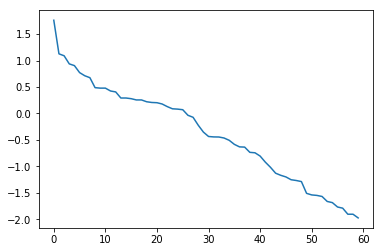

In [55]:
# Plotting predictions from sample listing 10005
plt.plot(range(len(results[results['listing_id'] == 10005]['predictions'])), 
         results[results['listing_id'] == 10005]['predictions']);